## Class Predictions with Keras ##
Simple 2D data-set example


In [1]:
#pip install keras
#pip install tensorflow
from keras.models import Sequential
from keras.layers import Dense

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### 1. Generate some simple Dummy Data ###
Generate some 2-dimensional random data that is clustered around two centers.
One cluster-group is class `y=0` and the other cluster-group is class `y=1`.  
You don't need a Neural Network to classify which class a blob is in (!) - this is just a very simple data-set to use for learning how the mechanics of Keras work.  
The `sklearn` `make_blobs` function is useful for generating this data.

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)

In [3]:
for i in range(0,4):
    print(X[i], y[i])

[-0.79415228  2.10495117] 0
[-9.15155186 -4.81286449] 1
[-3.10367371  3.90202401] 0
[-1.42946517  5.16850105] 0


Randomly split the data into a training and test set:

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

Plot the data we have generated in a chart using x and y axis for our 2 dimensions of data and a colour code for the two classes (0/1).

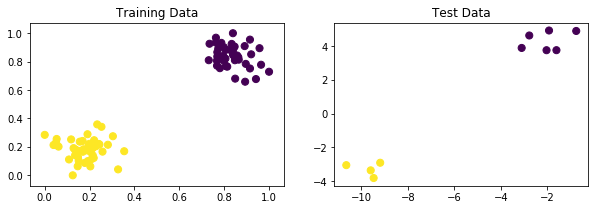

In [10]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(10,3))

plot1 = f.add_subplot(121)
plot2 = f.add_subplot(122)

plot1.scatter( X_train[:, 0], X_train[:, 1], s = 50, c = y_train[:]);
plot1.title.set_text("Training Data")
plot2.scatter( X_test[:, 0], X_test[:, 1], s = 50, c = y_test[:]);
plot2.title.set_text("Test Data")

plt.show()

#### Scale the Data ####
In general it is best to scale the data-set being fed into a TensorFlow network.  We can use the `sklearn` `MinMaxScaler()` to scale the data between a default range of 0 and 1.

In [6]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)

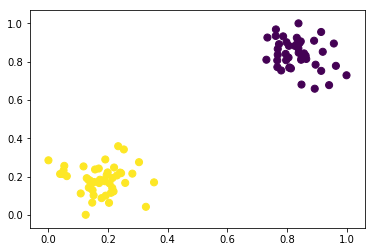

In [7]:
plt.scatter( X_train[:, 0], X_train[:, 1], s = 50, c = y_train);
plt.show()

### 2. Build a Simple Feed-Forward Neural Network ###
This network has 2 inputs, 4 neurons in the hidden layer and 1 output with a sigmoid activation funtion to give us an output between 1 and 0 to represent our two classes (y = 0 or y = 1).

https://keras.io/getting-started/sequential-model-guide/

https://towardsdatascience.com/exploring-activation-functions-for-neural-networks-73498da59b02


In [8]:
model = Sequential()
model.add(Dense(2, input_dim=2, activation='relu'))  #work with 2D data, activation type "Rectified Linear Unit"
model.add(Dense(4, activation='relu'))        #hidden layer of ReLU linear functions
model.add(Dense(1, activation='sigmoid'))     #sigmoid reduces the output into a (0,1) interval and it’s non linear
model.compile(loss='binary_crossentropy', optimizer='adam') # binary_crossentropy error fn: optimise prob it is a 1 or 0

The Binary Cross Entropy loss function trains a model to output a single value that determines wether the label should be a 1 or 0 (i.e. "A" or "B").

<img style="float: left;" src="./blobs_network_sml.png">

### 3. Train a Model with some Training Data ###
The model is trained over 1000 epocs - which is a lot for such a simple task.

In [9]:
hist = model.fit(X_train, y_train, epochs=1000, verbose=0)  
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________


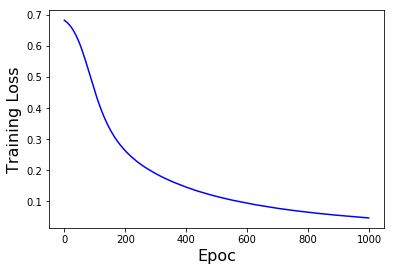

In [11]:
plt.plot(hist.history['loss'],'b')
plt.xlabel("Epoc", fontsize=16)
plt.ylabel("Training Loss", fontsize=16)
plt.show()

**Experiments to try**
+ We probably don't need 1000 epocs.  
+ Try experimenting with different numbers of neurons in the hidden layer.  
+ Try getting rid of the hidden layer alltogether.  
+ Try using sigmoid and tanh functions for the inputs and hidden layer.

### 4. Save and Load a Trained Model ###
Model weights are saved to HDF5 format.  
http://docs.h5py.org/en/stable/  
  
Use Python `h5py` to save and load Keras models.  Note - copying between different systems with different version of h5py can be unreliable.

"*It is not recommended to use pickle or cPickle to save a Keras mode*"

In [12]:
import h5py
from keras.models import load_model
model.save("./blobs_model.h5py")

In [13]:
del(model)

In [14]:
model = load_model('./blobs_model.h5py')

### 5. Validate against Test Set ###
Don't forget to normalise the test data-set before running predictions.  

The Keras `Sequential` model allows a `predict_classes()` function to be used to determine which class the prediction falls under (as opposed to giving us a number between 0 and 1 that is close to the class we are predicting)

In [15]:
X_test_scaled = scalar.transform(X_test)
test_predict = model.predict_classes(X_test_scaled)

In [16]:
from sklearn.metrics import accuracy_score
print("Accuracy Score:", accuracy_score(y_test, test_predict)*100, "Percent")

Accuracy Score: 100.0 Percent


### 6. Use the Model to Make Class Predictions with New Data ###



In [17]:
# new instances where we do not know what class (cluster) they are in
Xnew, _ = make_blobs(n_samples=5, centers=2, n_features=2, random_state=1)
Xnew = scalar.transform(Xnew)

We now have an array of 5 x 2D items to classify.

In [18]:
Xnew

array([[0.26814469, 0.0290577 ],
       [0.17582555, 0.16948267],
       [0.89337759, 0.65864154],
       [0.96440204, 0.77809405],
       [0.78082614, 0.75391697]])

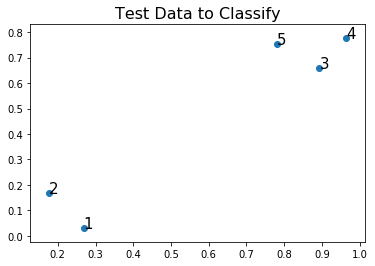

In [19]:
# create a list 1 .. 3 to annotate the dots
XnewItems = ["1","2","3", "4", "5"]
xList = Xnew[:,0]
yList = Xnew[:,1]

#plot
plt.scatter(Xnew[:, 0], Xnew[:,1], )
plt.title("Test Data to Classify", fontsize =16)
for i, txt in enumerate(XnewItems):
    plt.annotate(txt, (xList[i], yList[i]), fontsize = 15)

#### Make a prediction with `predict` ####

In [20]:
import numpy as np
np.set_printoptions(suppress=True)
for p in model.predict(Xnew).round(10):
    print(p)

[0.91401523]
[0.91401523]
[0.00272163]
[0.00045449]
[0.00245151]


#### Make a prediction with `predict_classes` ####

In [21]:
ynew = model.predict_classes(Xnew)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
    print("Item %s : X=%s, Predicted=%s" % (i+1, Xnew[i], ynew[i]))

Item 1 : X=[0.26814469 0.0290577 ], Predicted=[1]
Item 2 : X=[0.17582555 0.16948267], Predicted=[1]
Item 3 : X=[0.89337759 0.65864154], Predicted=[0]
Item 4 : X=[0.96440204 0.77809405], Predicted=[0]
Item 5 : X=[0.78082614 0.75391697], Predicted=[0]


#### Plot the test data with class predictions (Purple / Yellow for 0 / 1) ####

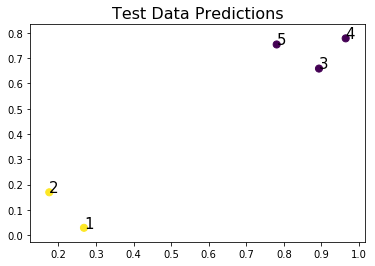

In [22]:
plt.scatter( Xnew[:, 0], Xnew[:, 1], s = 50, c = ynew.flatten());
for i, txt in enumerate(XnewItems):
    plt.annotate(txt, (xList[i], yList[i]), fontsize = 15)
plt.title("Test Data Predictions", fontsize=16)
plt.show()